In [23]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)

clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

clinical_merge_mouse = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")

# Display the data table for preview

clinical_merge_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [90]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

grouped_clinical_merge_mouse = clinical_merge_mouse.groupby(["Drug", "Timepoint"])

mean_tumor_volume_data = grouped_clinical_merge_mouse["Tumor Volume (mm3)"].mean()

# Create data frame with reseted index to hold the results (headers at the same level)
grouped_clinical_merge_mouse_df = pd.DataFrame(mean_tumor_volume_data).reset_index()

# Display the data frame for preview
grouped_clinical_merge_mouse_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor_volume_data = grouped_clinical_merge_mouse["Tumor Volume (mm3)"].sem()

# Create data frame with reseted index to hold the results (headers at the same level)
std_error_clinical_merge_mouse_df = pd.DataFrame(std_error_tumor_volume_data).reset_index()

# Display the data frame for preview
std_error_clinical_merge_mouse_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames

new_tumor_v_reformated_df = grouped_clinical_merge_mouse_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

new_tumor_v_reformated_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


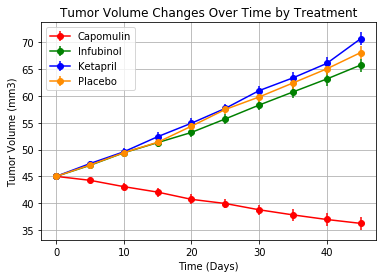

In [89]:
# Find Errors by treatments (Capomulin, Infubinol, Ketapril, and Placebo)

capomulin_std_error = std_error_clinical_merge_mouse_df[std_error_clinical_merge_mouse_df.Drug == 'Capomulin']['Tumor Volume (mm3)']
Infubinol_std_error = std_error_clinical_merge_mouse_df[std_error_clinical_merge_mouse_df.Drug == 'Infubinol']['Tumor Volume (mm3)']
Infubinol_std_error = std_error_clinical_merge_mouse_df[std_error_clinical_merge_mouse_df.Drug == 'Ketapril']['Tumor Volume (mm3)']
Infubinol_std_error = std_error_clinical_merge_mouse_df[std_error_clinical_merge_mouse_df.Drug == 'Placebo']['Tumor Volume (mm3)']


# Plot values 
plt.errorbar(new_tumor_v_reformated_df.index.values.tolist(), new_tumor_v_reformated_df["Capomulin"] , yerr = capomulin_std_error, label= "Capomulin", marker= "o", color="red")
plt.errorbar(new_tumor_v_reformated_df.index.values.tolist(), new_tumor_v_reformated_df["Infubinol"] , yerr = capomulin_std_error, label= "Infubinol", marker= "o", color="green")
plt.errorbar(new_tumor_v_reformated_df.index.values.tolist(), new_tumor_v_reformated_df["Ketapril"] , yerr = capomulin_std_error, label= "Ketapril", marker= "o", color="blue")
plt.errorbar(new_tumor_v_reformated_df.index.values.tolist(), new_tumor_v_reformated_df["Placebo"] , yerr = capomulin_std_error, label= "Placebo", marker= "o", color="darkorange")

plt.legend()
plt.title("Tumor Volume Changes Over Time by Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig("Tumor_Volume_Changes.png")

# Show the Figure
fig.show()


In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_data = grouped_clinical_merge_mouse["Metastatic Sites"].mean()

# Create data frame with reseted index to hold the results (headers at the same level)
grouped_metastatic_df = pd.DataFrame(mean_metastatic_data).reset_index()

# Show results
grouped_metastatic_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [14]:
# Store the Standard Error of Metastatic Site Grouped by Drug and Timepoint
std_error_metastatic_data = grouped_clinical_merge_mouse["Metastatic Sites"].sem()

# Create data frame with reseted index to hold the results (headers at the same level)
std_error_metastatic_df = pd.DataFrame(std_error_metastatic_data).reset_index()

# Display the data frame for preview
std_error_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [15]:
# Minor Data Munging to Re-Format the Data Frames

new_reformated_met_df = std_error_metastatic_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Show results
new_reformated_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


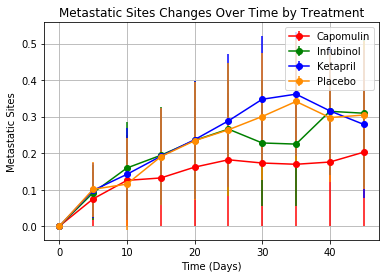

In [88]:
# Find Errors by treatments (Capomulin, Infubinol, Ketapril, and Placebo)

capomulin_met_std_error = std_error_metastatic_df[std_error_metastatic_df.Drug == 'Capomulin']['Metastatic Sites']
Infubinol_met_std_error = std_error_metastatic_df[std_error_metastatic_df.Drug == 'Infubinol']['Metastatic Sites']
Infubinol_met_std_error = std_error_metastatic_df[std_error_metastatic_df.Drug == 'Ketapril']['Metastatic Sites']
Infubinol_met_std_error = std_error_metastatic_df[std_error_metastatic_df.Drug == 'Placebo']['Metastatic Sites']

# Plot values 
plt.errorbar(new_reformated_met_df.index.values.tolist(), new_reformated_met_df["Capomulin"] , yerr = capomulin_met_std_error, label= "Capomulin", marker= "o", color="red")
plt.errorbar(new_reformated_met_df.index.values.tolist(), new_reformated_met_df["Infubinol"] , yerr = capomulin_met_std_error, label= "Infubinol", marker= "o", color="green")
plt.errorbar(new_reformated_met_df.index.values.tolist(), new_reformated_met_df["Ketapril"] , yerr = capomulin_met_std_error, label= "Ketapril", marker= "o", color="blue")
plt.errorbar(new_reformated_met_df.index.values.tolist(), new_reformated_met_df["Placebo"] , yerr = capomulin_met_std_error, label= "Placebo", marker= "o", color="darkorange")

plt.legend()
plt.title("Metastatic Sites Changes Over Time by Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()

# Save the Figure
plt.savefig("Metastatic_Sites_Changes.png")

# Show the Figure
fig.show()

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_data = grouped_clinical_merge_mouse["Mouse ID"].nunique()

# Create data frame with reseted index to hold the results (headers at the same level)
grouped_count_mice_df = pd.DataFrame(count_mice_data).reset_index()


# Show results

grouped_count_mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames

new_reformated_mice_df = grouped_count_mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Show results

new_reformated_mice_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


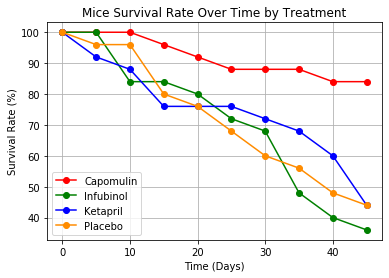

In [92]:
# Set the total amount of mice that started the treatment at Timepoint = 0
total_mice_started_treatment = 25

# Find mice survival rate per treatment
capomulin_surv_rate = new_reformated_mice_df["Capomulin"]/total_mice_started_treatment * 100
infubinol_surv_rate = new_reformated_mice_df["Infubinol"]/total_mice_started_treatment * 100
ketapril_surv_rate = new_reformated_mice_df["Ketapril"]/total_mice_started_treatment * 100
placebo_surv_rate = new_reformated_mice_df["Placebo"]/total_mice_started_treatment * 100

# Plot Values

plt.errorbar(new_reformated_mice_df.index.values.tolist(), capomulin_surv_rate , label= "Capomulin", marker= "o", color="red")
plt.errorbar(new_reformated_mice_df.index.values.tolist(), infubinol_surv_rate , label= "Infubinol", marker= "o", color="green")
plt.errorbar(new_reformated_mice_df.index.values.tolist(), ketapril_surv_rate , label= "Ketapril", marker= "o", color="blue")
plt.errorbar(new_reformated_mice_df.index.values.tolist(), placebo_surv_rate , label= "Placebo", marker= "o", color="darkorange")

plt.legend()
plt.title("Mice Survival Rate Over Time by Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# Save the Figure
plt.savefig("Mice_Survival_Rate.png")

# Show the Figure
fig.show()

In [19]:
# Calculate the percent changes for each drug

percent_change_tumor_volume_data = new_tumor_v_reformated_df.iloc[[0,9]].pct_change()*100

percent_change = percent_change_tumor_volume_data.iloc[1]

# Show results

percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [20]:
# Store all Relevant Percent Changes into a Tuple

tup_percent_change = list(tuple(zip(percent_change.index, percent_change)))

# Show results

tup_percent_change

[('Capomulin', -19.47530266789417),
 ('Ceftamin', 42.51649185589741),
 ('Infubinol', 46.12347172785185),
 ('Ketapril', 57.02879468660606),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315151),
 ('Propriva', 47.24117486320634),
 ('Ramicane', -22.32090046276667),
 ('Stelasyn', 52.08513428789896),
 ('Zoniferol', 46.57975086509525)]

In [31]:
# Splice the data between passing and failing drugs

# Initialize an empty list to collect passing or failing status
drug_status = []

# Create a new data frame to show the results 
status_df = pd.DataFrame(tup_percent_change, columns=["Drug", "Perecent Change"]).sort_values(by=["Perecent Change"]).set_index(['Drug'])

# Create a function to return the second element
def takeSecond(elem):
    return elem[1]

# For loop to iterate through the list of tupples and collect the drug status depending on the second elemt's value
# If second element is negative this imply a reduction in the tumor volume and consequently the Drug is considered as "Passed".
# If second element is positive this imply an increment in the tumor volume and consequently the Drug is considered as "Failed".
# The list of tuples is being sorted by second element during iteration to be aligned with the sorted data frame
for drug, value in sorted(tup_percent_change, key=takeSecond):
    if value < 0:
        drug_status.append("Passed")
    else:
        drug_status.append("Failed")
        
status_df["Passing / Failing"] = drug_status

# Show results

status_df



,Perecent Change,Passing / Failing
Drug,,
Ramicane,-22.320900,Passed
Capomulin,-19.475303,Passed
Ceftamin,42.516492,Failed
Infubinol,46.123472,Failed
Zoniferol,46.579751,Failed
Propriva,47.241175,Failed
Placebo,51.297960,Failed
Stelasyn,52.085134,Failed
Naftisol,53.923347,Failed


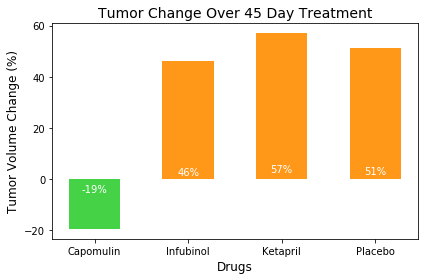

In [85]:
# Orient widths. Add labels, tick marks, etc.

fig, ax = plt.subplots()


y_value1 = [percent_change["Capomulin"]]
y_value2 = [percent_change["Infubinol"], percent_change["Ketapril"], percent_change["Placebo"]]
x_axis1 = np.arange(1)
x_axis2 = np.arange(1,4)

x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

rect_1 = ax.bar(x_axis1, y_value1, color='limegreen', alpha=0.9, align="center", width = 0.55)
rect_2 = ax.bar(x_axis2, y_value2 , color='darkorange', alpha=0.9, align="center", width = 0.55)



plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
        yticks=[-20, 0, 20, 40, 60])


ax.set_ylabel('Tumor Volume Change (%)', fontsize=12,)
ax.set_xlabel('Drugs', fontsize=12)
ax.set_title('Tumor Change Over 45 Day Treatment',fontsize=14)



# Use functions to label the percentages of changes

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha='center', va='top', color="white")

# Call functions to implement the function calls     
autolabel(rect_1)
autolabel(rect_2)
fig.tight_layout()

# Save the Figure
plt.savefig("Percentage_Tumor_Volume_Change.png")

# Show the Figure
fig.show()
